In [1]:
#Import everything we're going to need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime


%matplotlib inline

np.random.seed(45831)

#Read in global temperature dataset
full_df = pd.read_csv('datasets/jena_climate_2009_2016.csv')
temp_df = pd.read_csv('datasets/jena_climate_2009_2016.csv')
print("temp type", type(temp_df))
temp_df.describe()

#Convert to Farenheight
def convert_temp(C):
    return C * 9/5 + 32

def get_date_time(date_string):
    parsed_date = dict()
    date, time = date_string.split(" ")
    day, month, year = date.split(".")
    hours, minutes, seconds = time.split(":")
    
    parsed_date["Day"] = day
    parsed_date["Month"] = month
    parsed_date["Year"] = year
    parsed_date["Hours"] = hours
    parsed_date["Minutes"] = minutes
    parsed_date["Seconds"] = seconds
    
    return parsed_date

def get_simple_date(date_string):
    parsed_date = dict()
    date, time = date_string.split(" ")
    parsed_date["Date"] = date
    parsed_date["Time"] = time
    return parsed_date

def get_year(date_string):
    date, time = date_string.split(" ")
    month, day, year = date.split(".")
    return year
    
# full_df.head()
# print(get_date(full_df["Date Time"][5]))

display(full_df["Date Time"][5])
temp_df[ temp_df["Date Time"].str.contains("2010")]

for date in range(2009, 2011):
    display(temp_df[ temp_df["Date Time"].str.contains(str(date))])

temp type <class 'pandas.core.frame.DataFrame'>


'01.01.2009 01:00:00'

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.60
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.00


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
52557,01.01.2010 00:00:00,967.36,-2.84,272.89,-3.43,95.7,4.95,4.74,0.21,3.05,4.90,1244.34,2.96,4.61,25.08
52558,01.01.2010 00:10:00,967.56,-2.84,272.89,-3.41,95.8,4.95,4.75,0.21,3.06,4.91,1244.56,1.61,2.76,15.41
52559,01.01.2010 00:20:00,967.45,-2.85,272.88,-3.43,95.7,4.95,4.74,0.21,3.05,4.90,1244.48,2.00,3.10,17.04
52560,01.01.2010 00:30:00,967.45,-2.88,272.85,-3.46,95.8,4.94,4.73,0.21,3.05,4.89,1244.65,2.25,3.79,25.35
52561,01.01.2010 00:40:00,967.34,-2.90,272.84,-3.47,95.8,4.93,4.72,0.21,3.04,4.88,1244.57,2.64,3.77,23.64
52562,01.01.2010 00:50:00,967.29,-2.96,272.78,-3.53,95.8,4.91,4.70,0.21,3.03,4.86,1244.81,2.82,4.29,18.94
52563,01.01.2010 01:00:00,967.18,-3.03,272.72,-3.59,95.9,4.88,4.68,0.20,3.02,4.84,1245.00,2.92,4.09,22.06
52564,01.01.2010 01:10:00,967.14,-3.05,272.70,-3.59,96.0,4.88,4.68,0.20,3.02,4.84,1245.03,2.70,4.93,18.60
52565,01.01.2010 01:20:00,967.10,-3.03,272.73,-3.56,96.1,4.88,4.69,0.19,3.02,4.85,1244.89,2.28,3.53,20.80
52566,01.01.2010 01:30:00,967.09,-3.04,272.72,-3.56,96.2,4.88,4.69,0.19,3.02,4.85,1244.93,2.51,4.51,23.99


In [2]:
temp_df.head()
temp_df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [3]:
#min and max dates
print(temp_df["Date Time"].min())
print(temp_df["Date Time"].max())

01.01.2009 00:10:00
31.12.2016 23:50:00


In [4]:



temp_list = temp_df[["Date Time", "T (degC)", "rh (%)"]]
temp_list.describe()


,T (degC),rh (%)
count,420551.000000,420551.000000
mean,9.450147,76.008259
std,8.423365,16.476175
min,-23.010000,12.950000
25%,3.360000,65.210000
50%,9.420000,79.300000
75%,15.470000,89.400000
max,37.280000,100.000000


number of days in data set: 2922


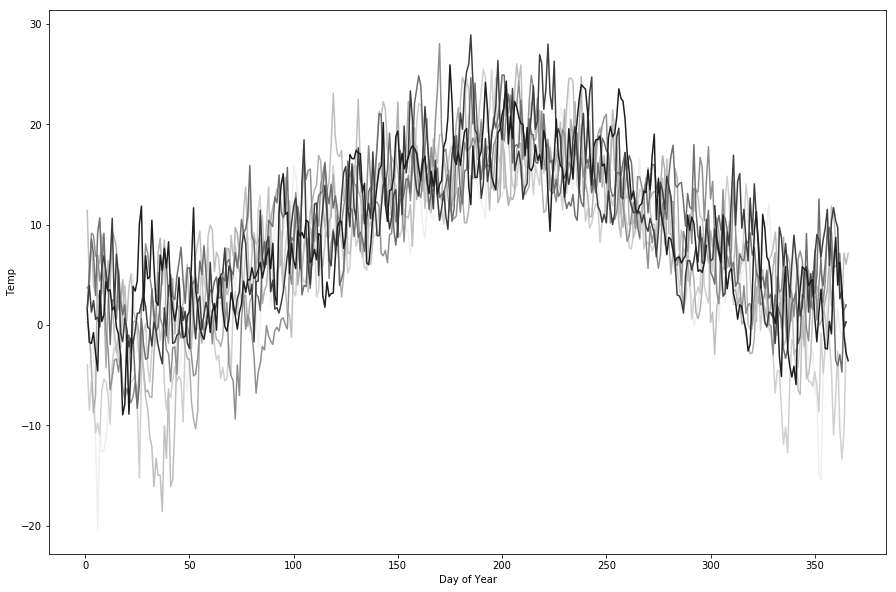

In [5]:
#Get all dates in data range
min_string = temp_df["Date Time"].min()
max_string = temp_df["Date Time"].max()
#Parse min date
date_string, time_string = min_string.split(" ")
min_day, min_month, min_year = date_string.split(".")
#Parse Max date
date_string, time_string = max_string.split(" ")
max_day, max_month, max_year = date_string.split('.')


start_date = datetime.date( year = int(min_year), month = int(min_month), day = int(min_day) )
end_date = datetime.date( year = int(max_year), month = int(max_month), day = int(max_day) )

date_list = list()

for day in range(( end_date - start_date ).days + 1):
    date_list.append( start_date + datetime.timedelta( day ) )

print("number of days in data set:", len(date_list))
    
#get temp and humidity only
temp_humid_df = temp_df[["Date Time", "T (degC)", "rh (%)"]]

#These should be values for one year only
temp_list = list()
plt_date = list()


plt.figure(figsize=(15, 10))
plt.xlabel("Day of Year")
plt.ylabel("Temp")
years_temp_list = list()
years_day_list = list()

#lists will hold one year worth of data only
year_temp_list = list()
year_day_list = list()

for date in date_list:
    year = date.year
    year_start = datetime.date(year=year, month=1, day=1)
    month = date.month
    day = date.day
    
    
    
    daily_df =  temp_humid_df[
        temp_humid_df["Date Time"].str.contains(
            "{:0>2}".format(day) + "." + "{:0>2}".format(month) + "." +
                "{:0>4}".format(year) + " " + "22:")]

    year_temp_list.append(pd.to_numeric(daily_df["T (degC)"]).mean())
    year_day_list.append((date - year_start).days + 1)
    
    #finished processing last day of year
    if month == 12 and day == 31:
        years_temp_list.append(year_temp_list)
        years_day_list.append(year_day_list)
        year_day_list = list()
        year_temp_list = list()

color_list = ["#efefef", "#cfcfcf", "#afafaf", "#bfbfbf", "#8f8f8f", "#6f6f6f", "#3f3f3f", "#1f1f1f"]
color_index = 0


for year in range(0, int(max_year) - int(min_year) + 1):
    display(plt.plot(years_day_list[year], years_temp_list[year], color=color_list[color_index]))
    color_index +=1


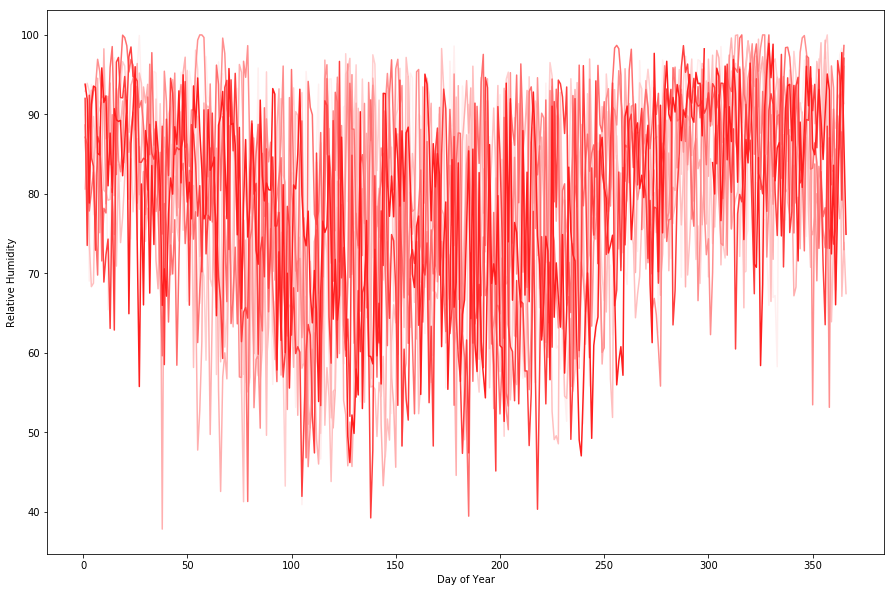

In [6]:
#Get all dates in data range
min_string = temp_df["Date Time"].min()
max_string = temp_df["Date Time"].max()
#Parse min date
date_string, time_string = min_string.split(" ")
min_day, min_month, min_year = date_string.split(".")
#Parse Max date
date_string, time_string = max_string.split(" ")
max_day, max_month, max_year = date_string.split('.')


start_date = datetime.date( year = int(min_year), month = int(min_month), day = int(min_day) )
end_date = datetime.date( year = int(max_year), month = int(max_month), day = int(max_day) )

date_list = list()

for day in range(( end_date - start_date ).days + 1):
    date_list.append( start_date + datetime.timedelta( day ) )
    
#get temp and humidity only
temp_humid_df = temp_df[["Date Time", "T (degC)", "rh (%)"]]

#These should be values for one year only
temp_list = list()
plt_date = list()

plt.figure(figsize=(15, 10))
plt.xlabel("Day of Year")
plt.ylabel("Relative Humidity")
years_temp_list = list()
years_day_list = list()

#lists will hold one year worth of data only
year_temp_list = list()
year_day_list = list()

for date in date_list:
    year = date.year
    year_start = datetime.date(year=year, month=1, day=1)
    month = date.month
    day = date.day
    
    daily_df =  temp_humid_df[
        temp_humid_df["Date Time"].str.contains(
            "{:0>2}".format(day) + "." + "{:0>2}".format(month) + "." +
                "{:0>4}".format(year) + " " + "22:")]

    year_temp_list.append(pd.to_numeric(daily_df["rh (%)"]).mean())
    year_day_list.append((date - year_start).days + 1)
    
    #finished processing last day of year
    if month == 12 and day == 31:
        years_temp_list.append(year_temp_list)
        years_day_list.append(year_day_list)
        year_day_list = list()
        year_temp_list = list()

color_list = ["#ffefef", "#ffcfcf", "#ffafaf", "#ffbfbf", "#ff8f8f", "#ff6f6f", "#ff3f3f", "#ff1f1f"]
color_index = 0

for index in range(0, int(max_year) - int(min_year) + 1):
    display(plt.plot(years_day_list[index], years_temp_list[index], color=color_list[color_index]))
    color_index +=1
